In [55]:
###Country Data analysis

# PROBLEM STATEMENT

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

#Expected result

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. You are also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#reading Dataset
countrydata = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Checking for Null objects
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# PCA procedure

In [5]:
#Creating separate dataset for PCA analysis
PCA_Data = countrydata[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
PCA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 11.8 KB


# Splitting data set 

In [6]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test = train_test_split(PCA_Data, train_size=0.7,test_size=0.3,random_state=100)

# After multiple iteration choosing random state for 4

In [7]:
##PCA analysis
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=4)
x_pca = StandardScaler().fit_transform(PCA_Data)

In [8]:
pca.fit(x_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=4,
  svd_solver='randomized', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [10]:
colnames = list(PCA_Data.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


In [11]:
pcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
PC1        9 non-null float64
PC2        9 non-null float64
PC3        9 non-null float64
PC4        9 non-null float64
Feature    9 non-null object
dtypes: float64(4), object(1)
memory usage: 440.0+ bytes


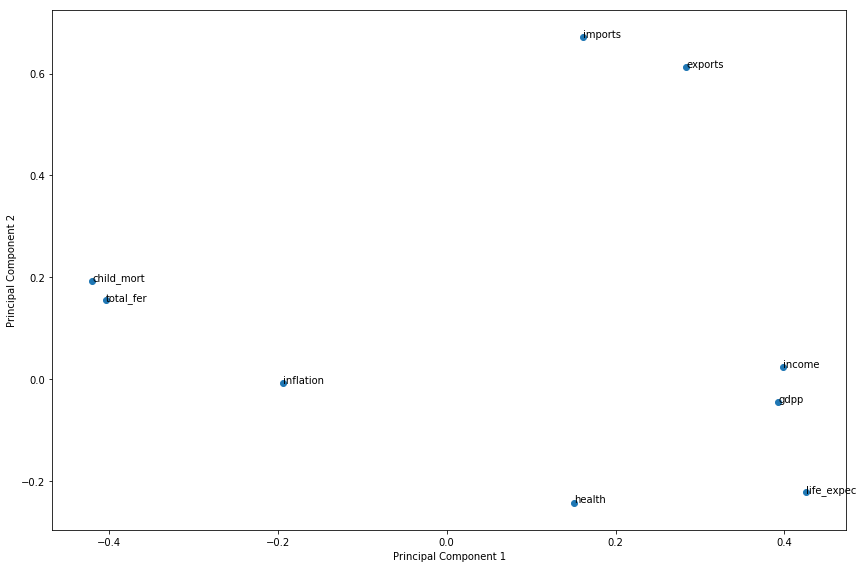

In [12]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see PC1 has Income, gdpp and life expectancy are the variable 
and for PC2 imports and exports

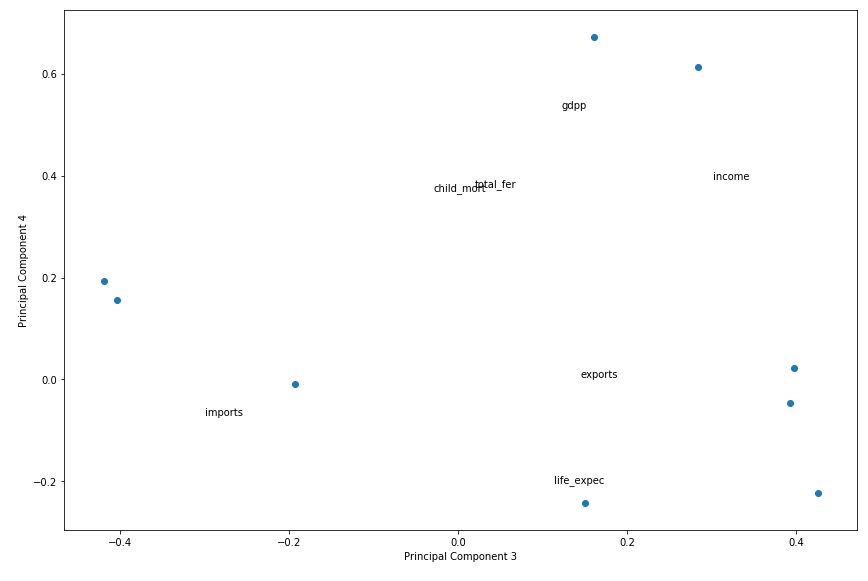

In [13]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC3[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

# Scree Plot

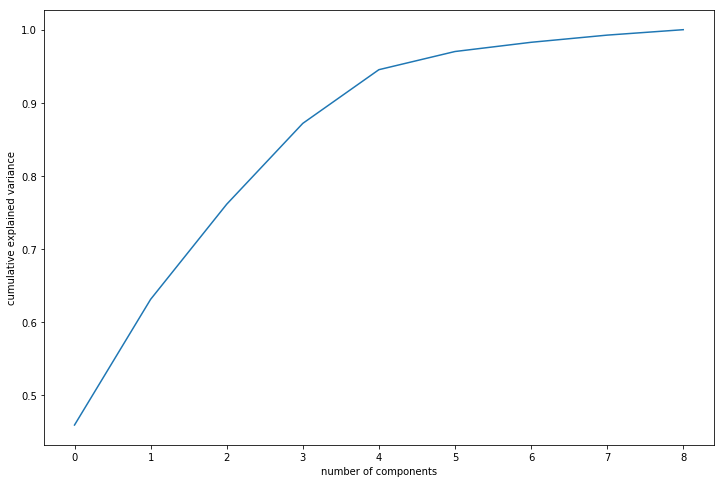

In [14]:
#Scree plot to determine the number of PCs required
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

from the scree plot we can see 4 PC variables are sufficient

In [15]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

# Performing Incremental PCA and see if this improves efficiency

In [16]:
#Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [17]:
df_train_pca = pca_final.fit_transform(x_pca)
df_train_pca.shape

(167, 4)

In [18]:
pca_df_final = pd.DataFrame(df_train_pca)
pca_df_final.head()

,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [19]:
pca_df_final.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4'}, inplace= True)
pca_df_final.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [20]:
pca_df_final.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.659217e-17,1.429329e-17,-2.476396e-17,1.662011e-17
std,2.039726e+00,1.247144e+00,1.083371e+00,1.000238e+00
min,-4.878925e+00,-2.991196e+00,-5.590269e+00,-1.582161e+00
25%,-1.383574e+00,-7.481349e-01,-4.154744e-01,-7.901529e-01
50%,2.418370e-02,-9.344038e-02,1.937511e-01,-2.939462e-01
75%,1.224232e+00,5.568934e-01,5.140716e-01,7.090722e-01
90%,2.461331e+00,1.276336e+00,1.067970e+00,1.226926e+00
95%,3.105192e+00,1.716160e+00,1.465341e+00,1.775725e+00
99%,4.761754e+00,4.808004e+00,2.531317e+00,2.780284e+00


In [21]:
countrydata_df = countrydata.reset_index()
countrydata_df.head()


,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
combined_country = pd.concat([countrydata_df,pca_df_final], axis = 1)
combined_country.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808


In [23]:
combined_country = combined_country.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], axis = 1)
combined_country.head()

,index,country,PC1,PC2,PC3,PC4
0,0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,3,Angola,-2.930969,1.699437,-1.521734,0.875966
4,4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808


# Hopkins Statistics

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(pca_df_final)

0.8017463010716499

# K-Means analysis

In [26]:
# Kmeans with K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50)
model_clus2.fit(pca_df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df_final)
    sse_.append([k, silhouette_score(pca_df_final, kmeans.labels_)])

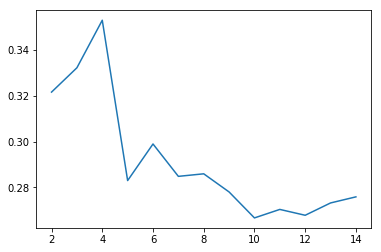

In [28]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

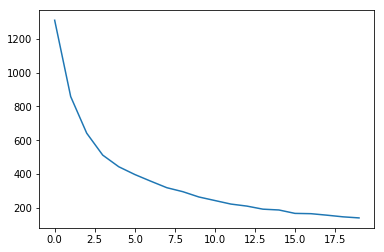

In [40]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df_final)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [30]:
pca_df_final.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [31]:
# analysis of clusters formed
combined_country.index = pd.RangeIndex(len(combined_country.index))
combined_country_km2 = pd.concat([combined_country, pd.Series(model_clus2.labels_)], axis=1)
combined_country_km2.columns = ['Index','Country', 'PC1', 'PC2', 'PC3','PC4', 'ClusterID']
combined_country_km2.head()

,Index,Country,PC1,PC2,PC3,PC4,ClusterID
0,0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1
1,1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,3,Angola,-2.930969,1.699437,-1.521734,0.875966,1
4,4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0


In [33]:
combined_country_km2['ClusterID'].value_counts(dropna = False)

0    99
1    68
Name: ClusterID, dtype: int64

In [34]:
combined_country_km2.loc[combined_country_km2['ClusterID']== 0]

,Index,Country,PC1,PC2,PC3,PC4,ClusterID
1,1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
4,4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0
5,5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,0
6,6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,0
7,7,Australia,2.339456,-1.998120,-0.237052,1.132490,0
8,8,Austria,2.973859,-0.734849,0.548421,1.192561,0
9,9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,0
10,10,Bahamas,1.266074,-0.665088,0.453533,0.059479,0
11,11,Bahrain,1.670737,0.560394,-1.020168,-0.178515,0


# K-Means for K=4

In [37]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=40)
model_clus4.fit(pca_df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=40,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Silhoutte Score for K = 4

In [38]:
sse_4 = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df_final)
    sse_4.append([k, silhouette_score(pca_df_final, kmeans.labels_)])

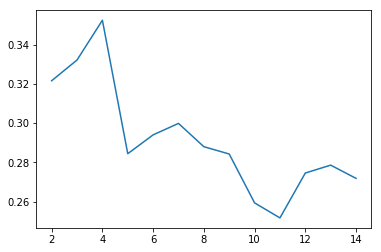

In [39]:
plt.plot(pd.DataFrame(sse_4)[0], pd.DataFrame(sse_4)[1]);

 # Sum of Squared Distances

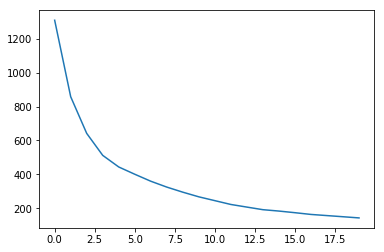

In [41]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=40)
    model_clus.fit(pca_df_final)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [42]:
# analysis of clusters formed
combined_country.index = pd.RangeIndex(len(combined_country.index))
combined_country_km4 = pd.concat([combined_country, pd.Series(model_clus4.labels_)], axis=1)
combined_country_km4.columns = ['Index','Country', 'PC1', 'PC2', 'PC3','PC4', 'ClusterID']
combined_country_km4.head()

,Index,Country,PC1,PC2,PC3,PC4,ClusterID
0,0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1
1,1,Albania,0.429358,-0.587859,0.321052,-1.171193,2
2,2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,2
3,3,Angola,-2.930969,1.699437,-1.521734,0.875966,1
4,4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,2


In [43]:
combined_country_km4['ClusterID'].value_counts(dropna = False)

2    87
1    47
0    30
3     3
Name: ClusterID, dtype: int64

In [52]:
combined_country_km4.loc[combined_country_km4['ClusterID']== 1]

,Index,Country,PC1,PC2,PC3,PC4,ClusterID
0,0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1
3,3,Angola,-2.930969,1.699437,-1.521734,0.875966,1
17,17,Benin,-2.679195,0.391235,0.139349,0.321834,1
21,21,Botswana,-0.881545,0.461932,0.620368,0.384517,1
25,25,Burkina Faso,-3.125200,0.023315,0.410699,1.096936,1
26,26,Burundi,-2.895611,-0.419723,1.434451,1.773143,1
28,28,Cameroon,-2.814184,0.054609,0.238777,0.580951,1
31,31,Central African Republic,-3.974389,0.357584,0.186493,0.973005,1
32,32,Chad,-3.562849,1.267213,0.025108,1.247079,1
36,36,Comoros,-2.098048,0.326629,0.255810,-0.097318,1


# Heirarchical Clustering analysis of complete and single method

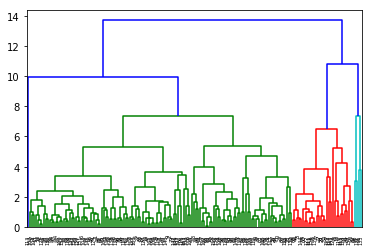

In [44]:
#Heirarchical clustering
# heirarchical clustering
mergings = linkage(pca_df_final, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

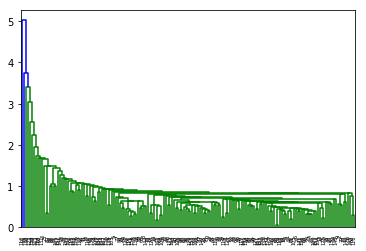

In [53]:
#Heirarchical clustering
# heirarchical clustering
mergings = linkage(pca_df_final, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
combined_country_km4.mean()

Index        8.300000e+01
PC1          2.659217e-17
PC2          1.429329e-17
PC3         -2.476396e-17
PC4          1.662011e-17
ClusterID    1.377246e+00
dtype: float64

# Result analysis
Cluster 1 are the countries which require more allocation of the aide, followed by countries in cluster 2, then countries in cluster 0 and last are the rich countries in cluster 3